# Introduction
```
Author: Roy Wilds
Created: December 28, 2020
Description: Basic Exploratory Data Analysis (EDA) walkthrough.

Credit: Adapted from the terrific work of Arden Dertat https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%202%20-%20Case%20Studies.ipynb
```

This notebook captures common steps and operations you should perform with any new dataset **before** you do deep analysis, machine learning, modeling, etc. An EDA is meant to help you understand your data. 

Notes
- Assumes your data is rectangular (rows and columns).
- A mix of continuous and categorical variables. Some analysis will only apply to one or the other.
- A couple analyses assume your data has categorical labels (e.g. `classA` and `classB`).

In [66]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

We use the HR dataset from Arden's original notebook:https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%202%20-%20Case%20Studies.ipynb 

This is a dataset for ~15k employees that records various attributes (satisfaction, hours worked on avg, dept, etc.) and a column (`left`) indicating if they have left the company. His notebook focusses on building a predictive model; whereas here I'm just going to focus on doing an EDA of this dataset since it's a small size and has a mix of continuous and categorical data.

To start, we take a look at a sample of rows and use the built-in `.describe()` method for dataframes in pandas to get a high level idea of what's in the data.

In [67]:
rawdf = pd.read_csv('../data/HR.csv')
rawdf.sample(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
984,0.75,0.86,5,260,5,0,0,IT,low,1
14167,0.85,0.87,4,152,7,0,0,sales,low,0
7649,0.94,0.85,4,180,4,0,0,sales,medium,0
9466,0.99,0.70,2,182,4,0,0,accounting,medium,0
14885,0.45,0.53,2,159,3,0,0,sales,low,1


In [68]:
rawdf.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,"14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00","14,999.00"
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.02,0.24
std,0.25,0.17,1.23,49.94,1.46,0.35,0.14,0.43
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


The `left` variable is the label in the supervised problem that Arden walks through. If it is `0` if the employee is still with the company and `1` if they left. We'll revisit this later in more detail.

## Correlation
To start, let's see what the correlation is between all the dimensions we have.

<AxesSubplot:>

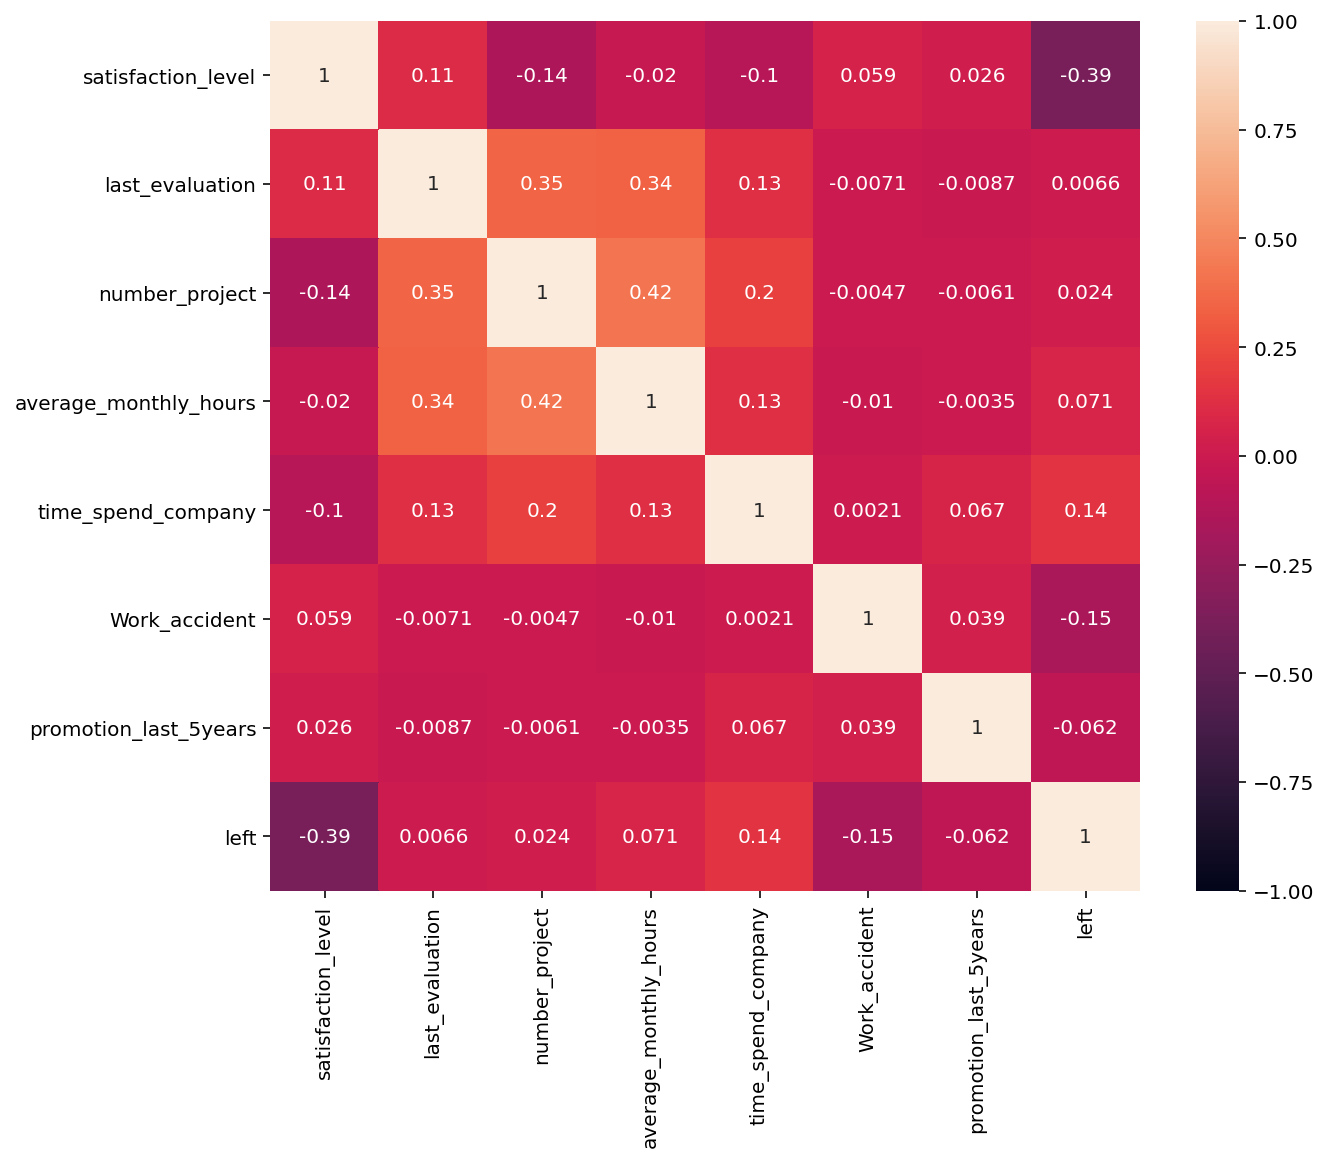

In [69]:
plt.figure(figsize=(10,8))
sns.heatmap(rawdf.corr(), annot=True, square=True, vmin=-1, vmax=1)

We can see that there isn't any super strong correlation between our dataset columns. 0.42 between `number_project` and `average_monthly_hours` is the strongest... and kinda makes sense (lots of projects, so lots of hours worked). 

If you do see very strong correlations between some of your variables in a dataset then you should try to understand why that might be, and adjust any data preparation/processing steps you may make to ensure that correlation doesn't bias or confuse your results.

## Per Variable Distributions
Next, let's just see how each variable is distributed. This will only work for now with our variables that are numerically encoded (both continuous and categorical/ordinal ones such as our `left` variable).

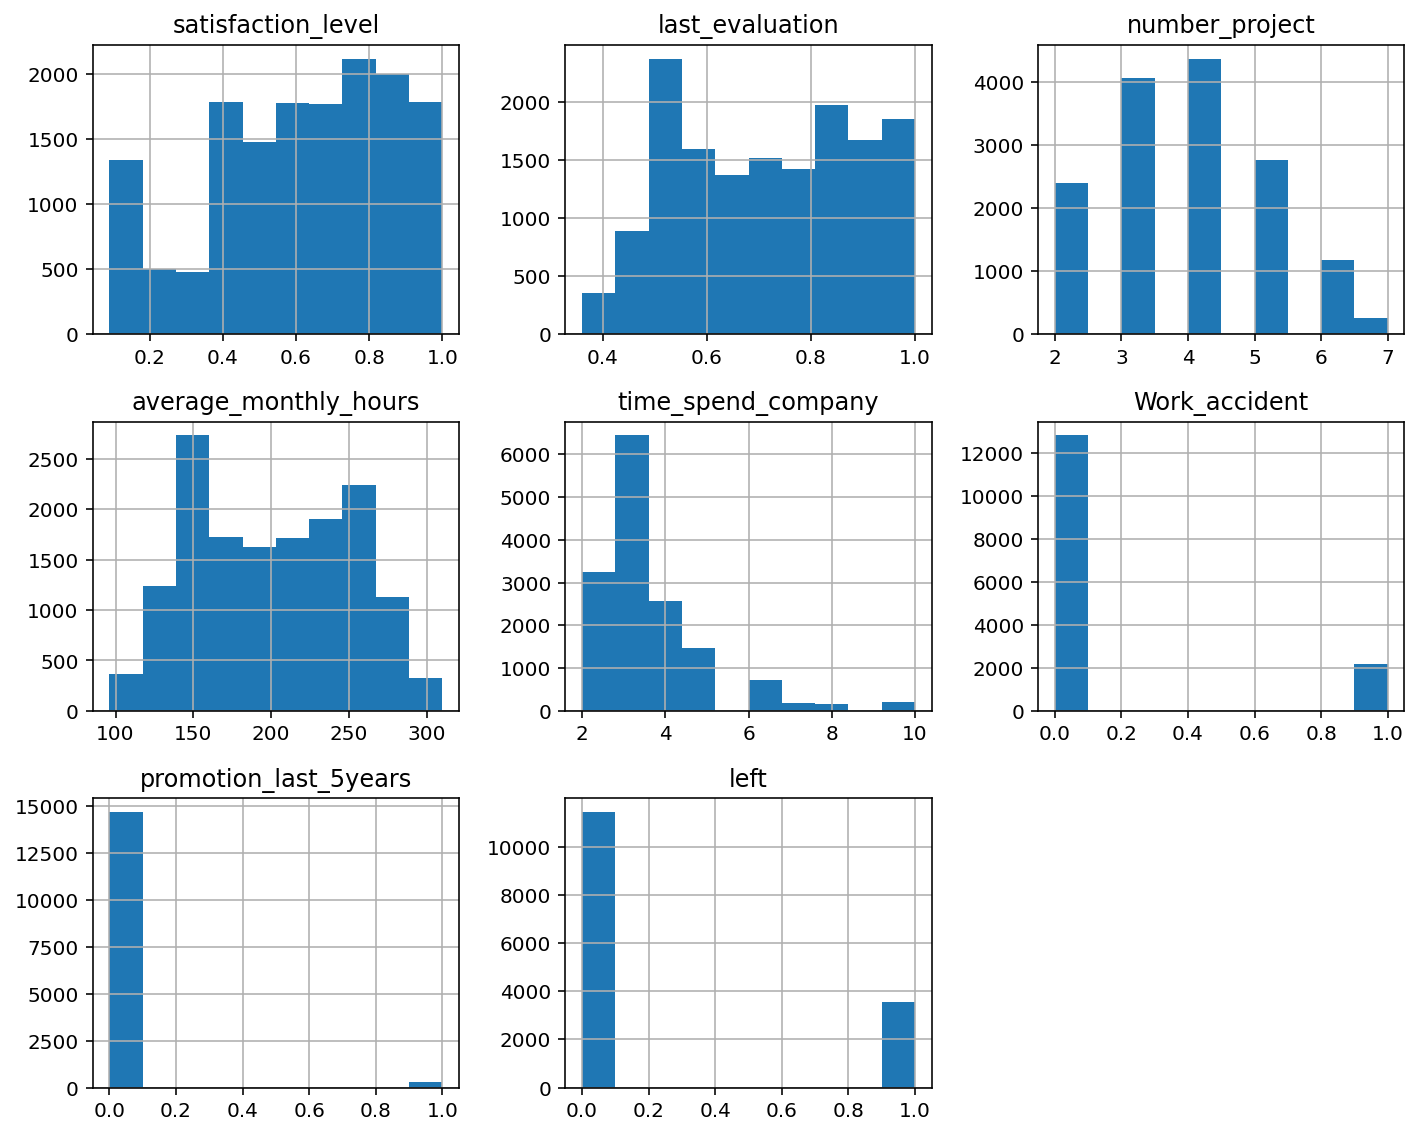

In [70]:
rawdf.hist(figsize=(10,8))
plt.tight_layout()

We can see our 3 categorical variables with the only `0` or `1` values. We see here too that if we're building a predictor for `left` then there's some class imbalance at play. About 5x as many did not leave (`left=0`) vs did leave.

In [71]:
rawdf[rawdf['left']==0]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
2000,0.58,0.74,4,215,3,0,0,sales,low,0
2001,0.82,0.67,2,202,3,0,0,sales,low,0
2002,0.45,0.69,5,193,3,0,0,sales,low,0
2003,0.78,0.82,5,247,3,0,0,sales,low,0
2004,0.49,0.60,3,214,2,0,0,sales,low,0
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,1,management,high,0
14207,0.74,0.95,5,266,10,0,1,management,high,0
14208,0.85,0.54,3,185,10,0,1,management,high,0
14209,0.33,0.65,3,172,10,0,1,marketing,high,0


In [72]:
df_concat = pd.concat([rawdf[rawdf['left']==0],rawdf[rawdf['left']==1]], keys=['0','1']).reset_index(level=0)
df_melt = df_concat.melt(id_vars='level_0', var_name='var_id')
df_melt.head()

,level_0,var_id,value
0,0,satisfaction_level,0.58
1,0,satisfaction_level,0.82
2,0,satisfaction_level,0.45
3,0,satisfaction_level,0.78
4,0,satisfaction_level,0.49


Found a great post on StackOverflow for plotting overlapping distributions: https://stackoverflow.com/a/65447564 I believe there are cases where the bins may not align well, but for this example it works well.

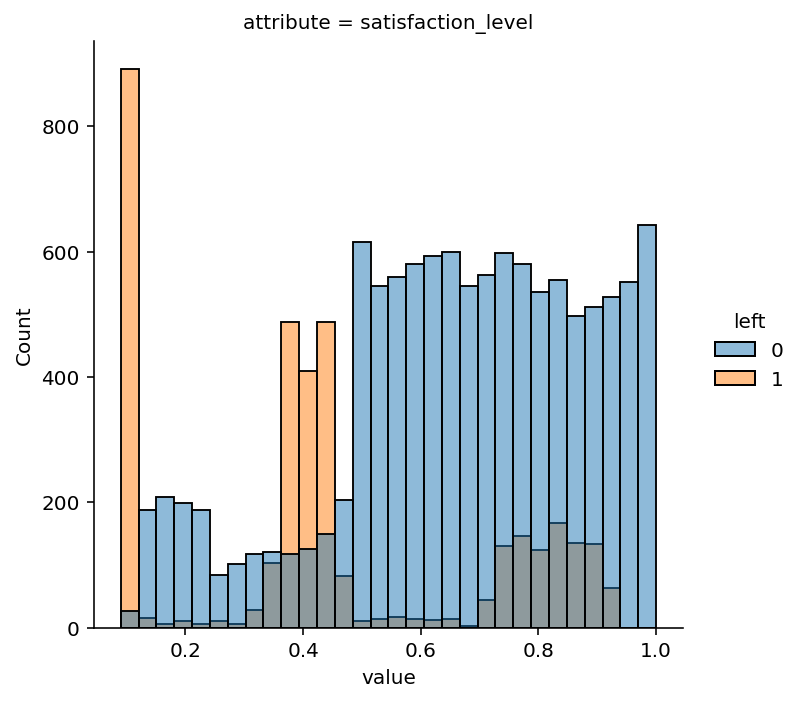

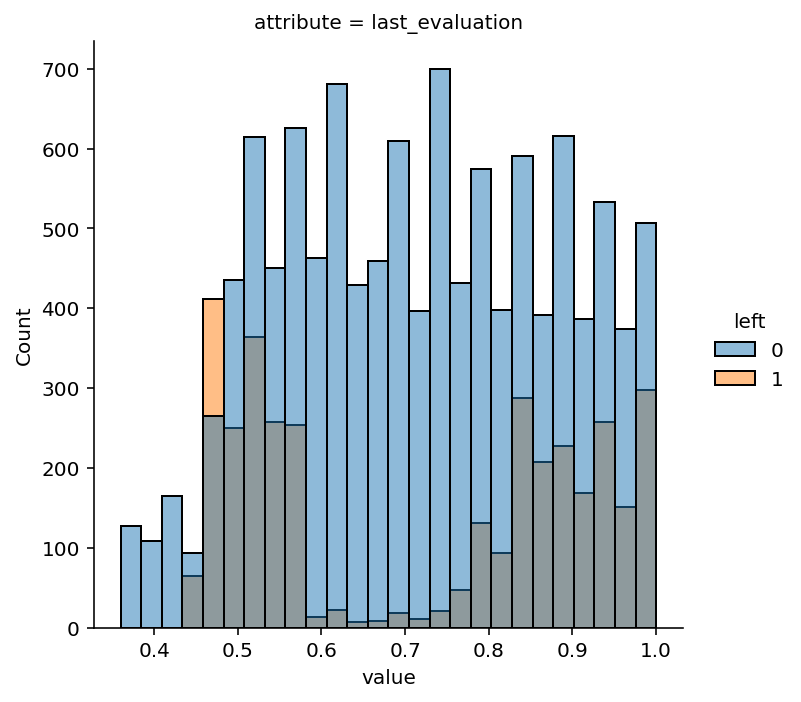

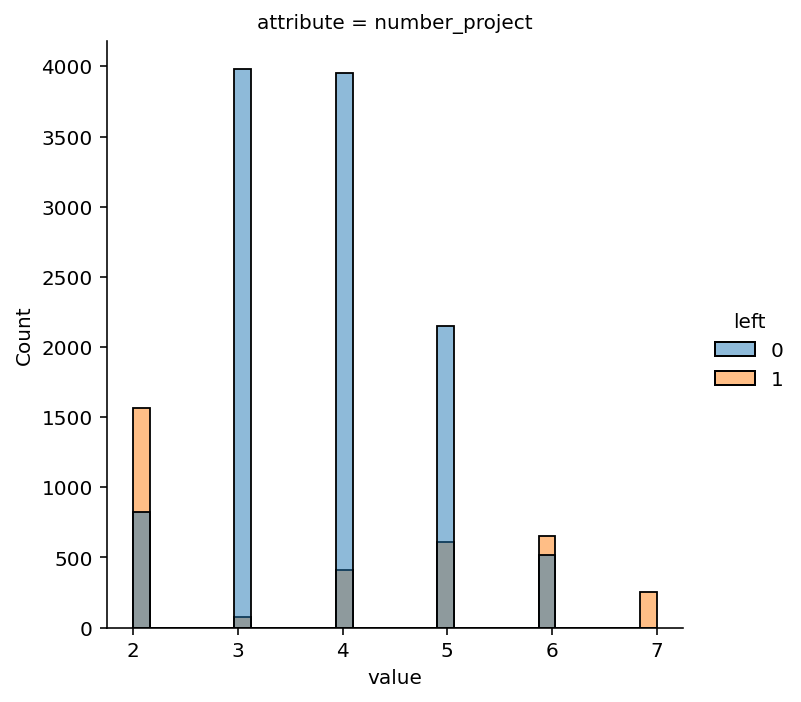

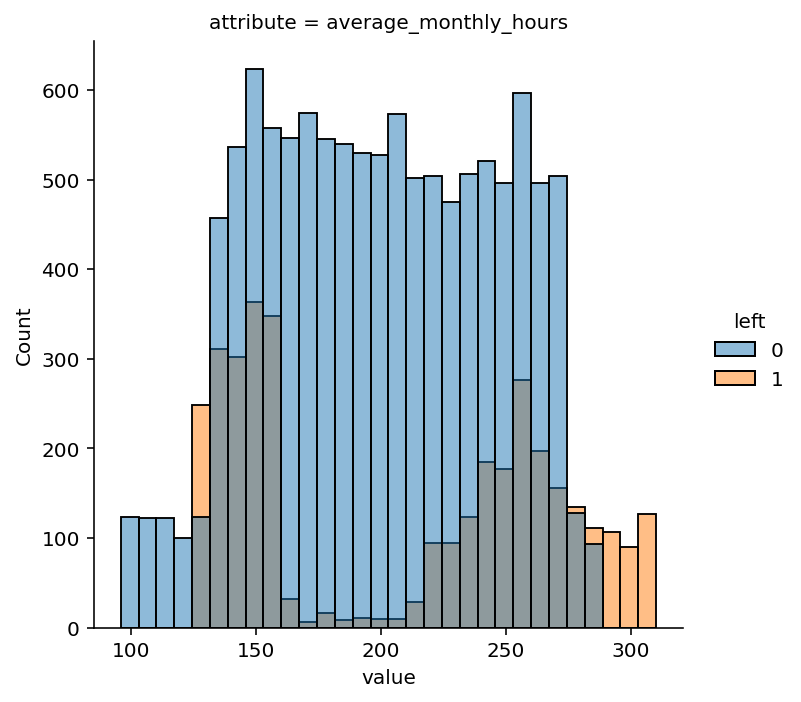

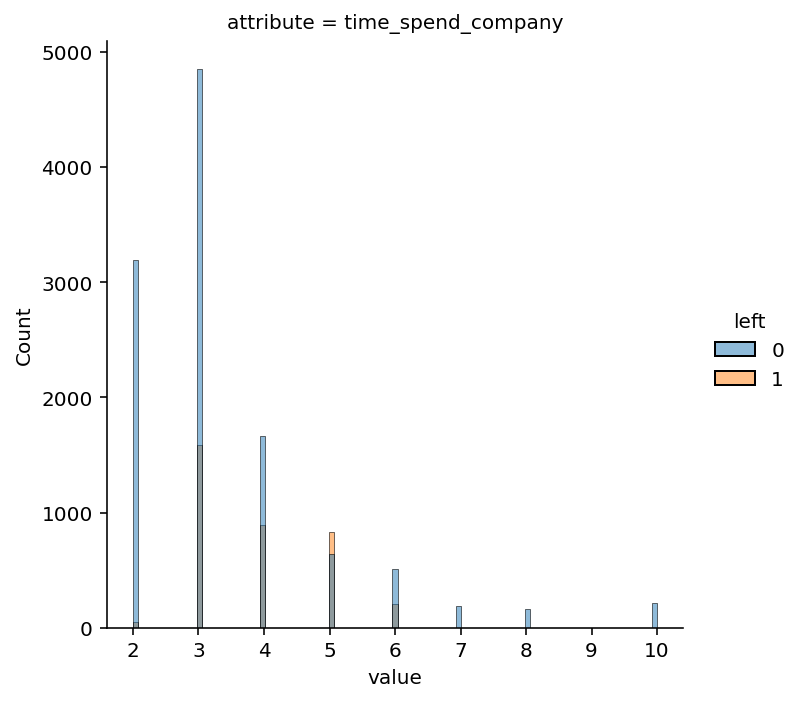

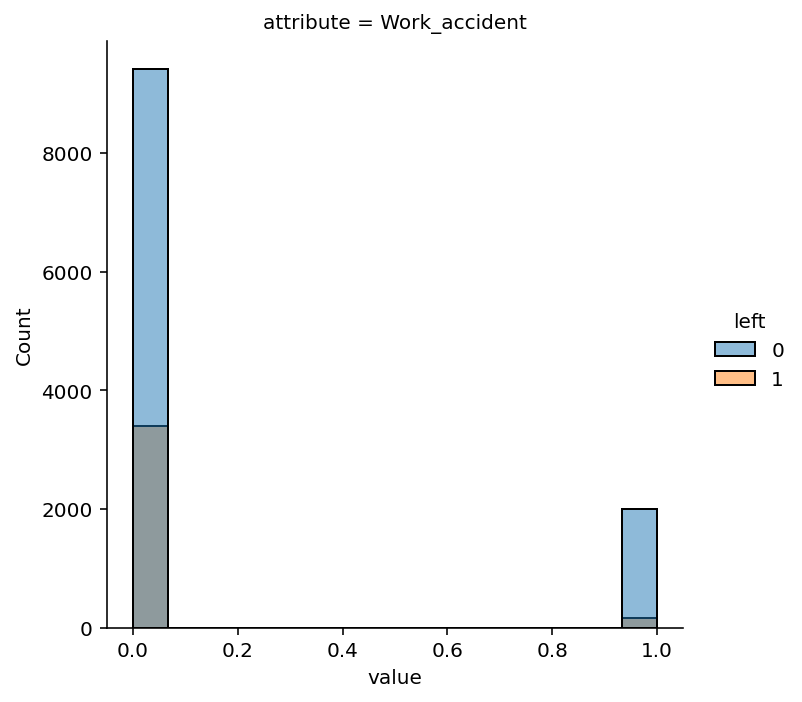

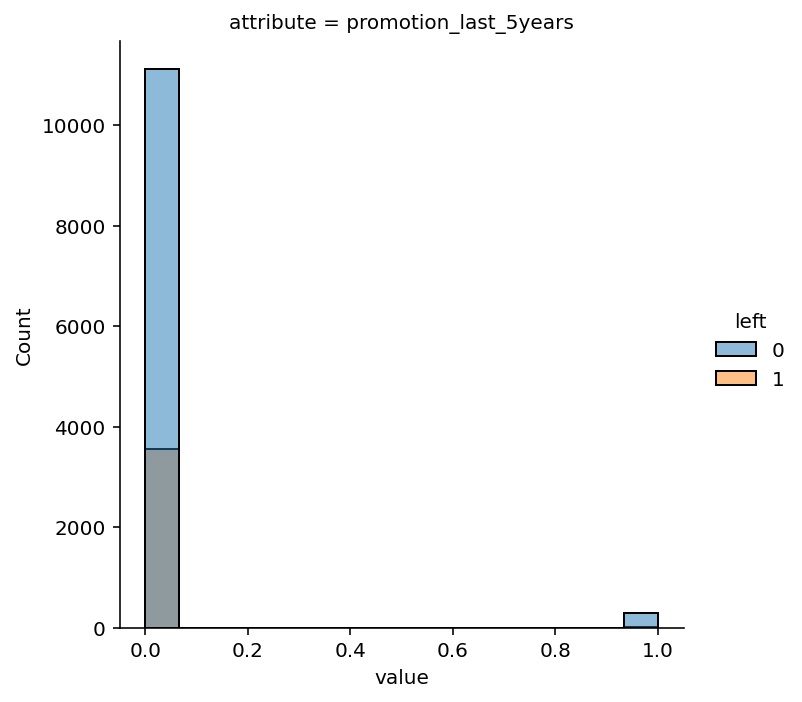

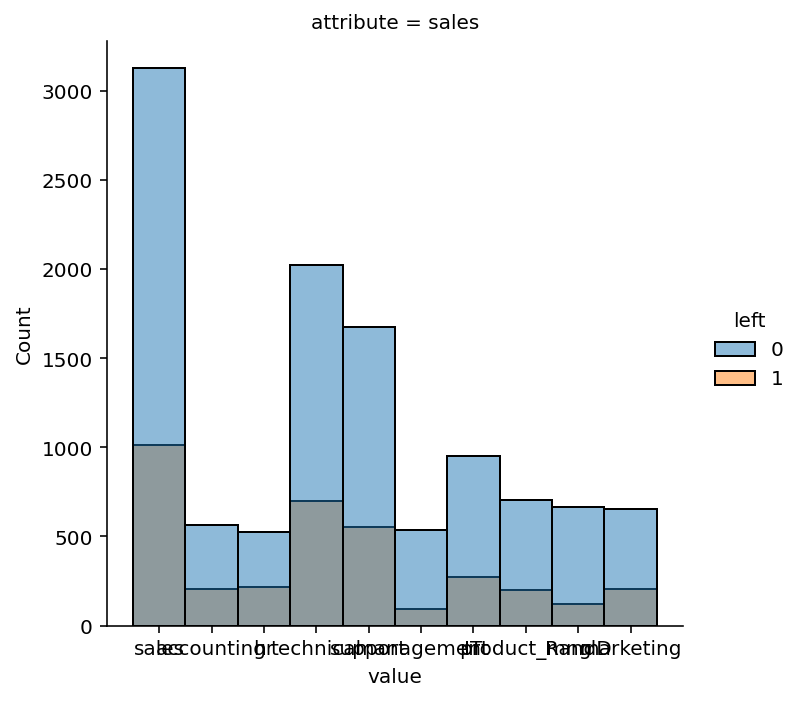

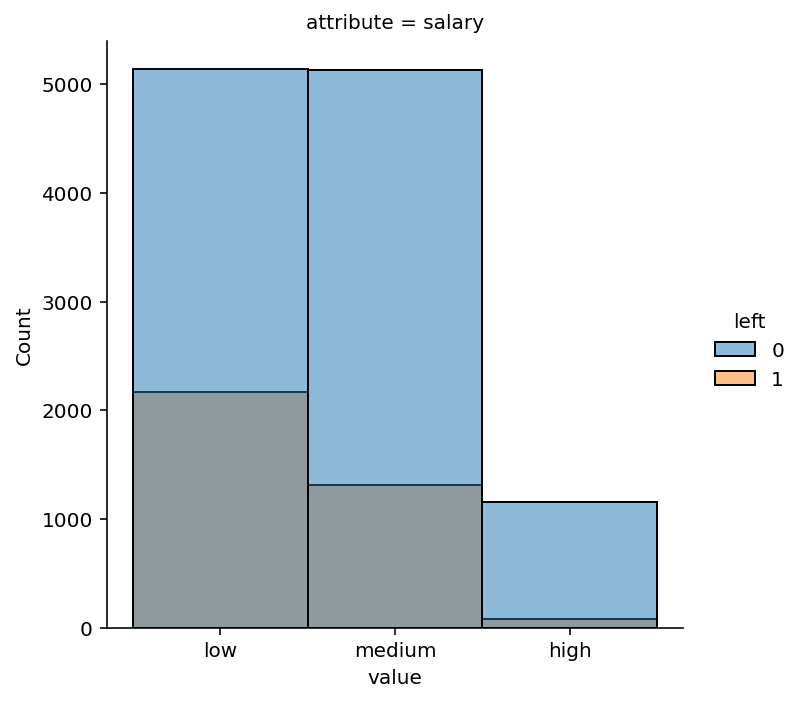

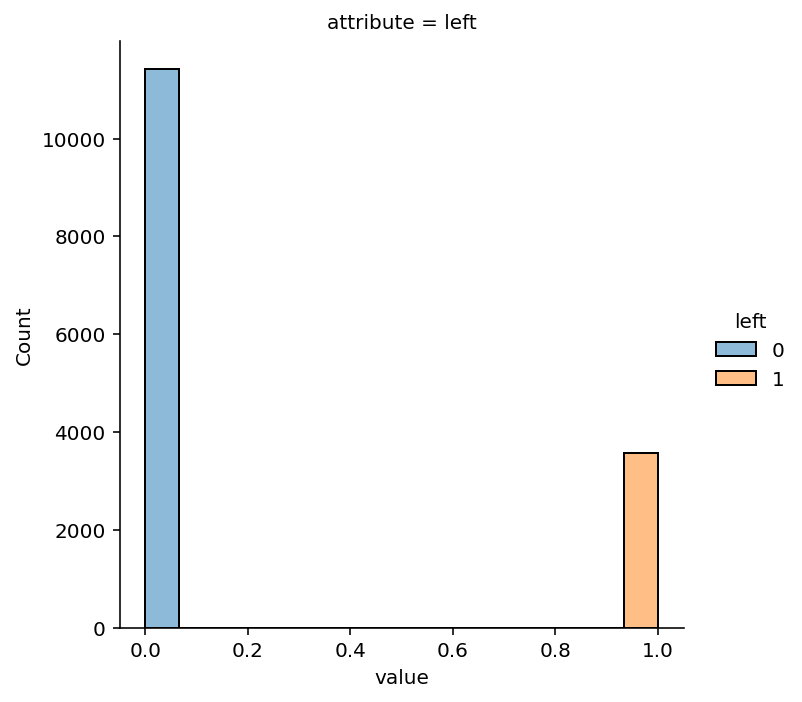

In [73]:
for c in rawdf.columns:
    df_plot = df_melt[df_melt['var_id']==c]
    df_plot.columns = ['left','attribute','value']
    sns.displot(df_plot, kind='hist', x='value', col='attribute', hue='left')

The presentation could use a bit of tweaking, but this works quite well. For each variable (`satisfaction_level`, etc.) we can see the distribution of that variable for the `left=0` (stayed) and `left=1` (gone) outcome. 

This gives us insight into how predictive some variables can be of the predictor we care about (`left` in this case). It's a more detailed insight into the single-value correlation number that we got earlier.

Note: I spent a brief bit of time trying to lay out the above non-vertically, so that there'd be multiple plots in the width of the browser window but my first handful of attempts failed. Leaving that as a to-do

## Categorical Variables
Thus far we've focused on the variables with numerical encodings. 

A standard approach to dealing with categorical variables is to one-hot encoding to replace each categorical value for an attribute with a new column, and having `0` for all columns except a `1` for the column corresponding to the value it had. 

Pandas has very handy functions for doing this. We'll do this for the `sales` and `salary` variables.

In [74]:
df = rawdf.copy() # Make a copy so we don't break the operations on df from first part of notebook.

categorical_features = ['sales', 'salary']
df_cat = pd.get_dummies(df[categorical_features])
df = df.drop(categorical_features, axis=1)
df = pd.concat([df, df_cat], axis=1)
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,left,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


With all the additional variables, we'll display the correlation matrix in % units truncated to the whole number. Of course we could just subset the columns to show in order to reduce the size, but this shows another feature of the Seaborn heatmap

<AxesSubplot:>

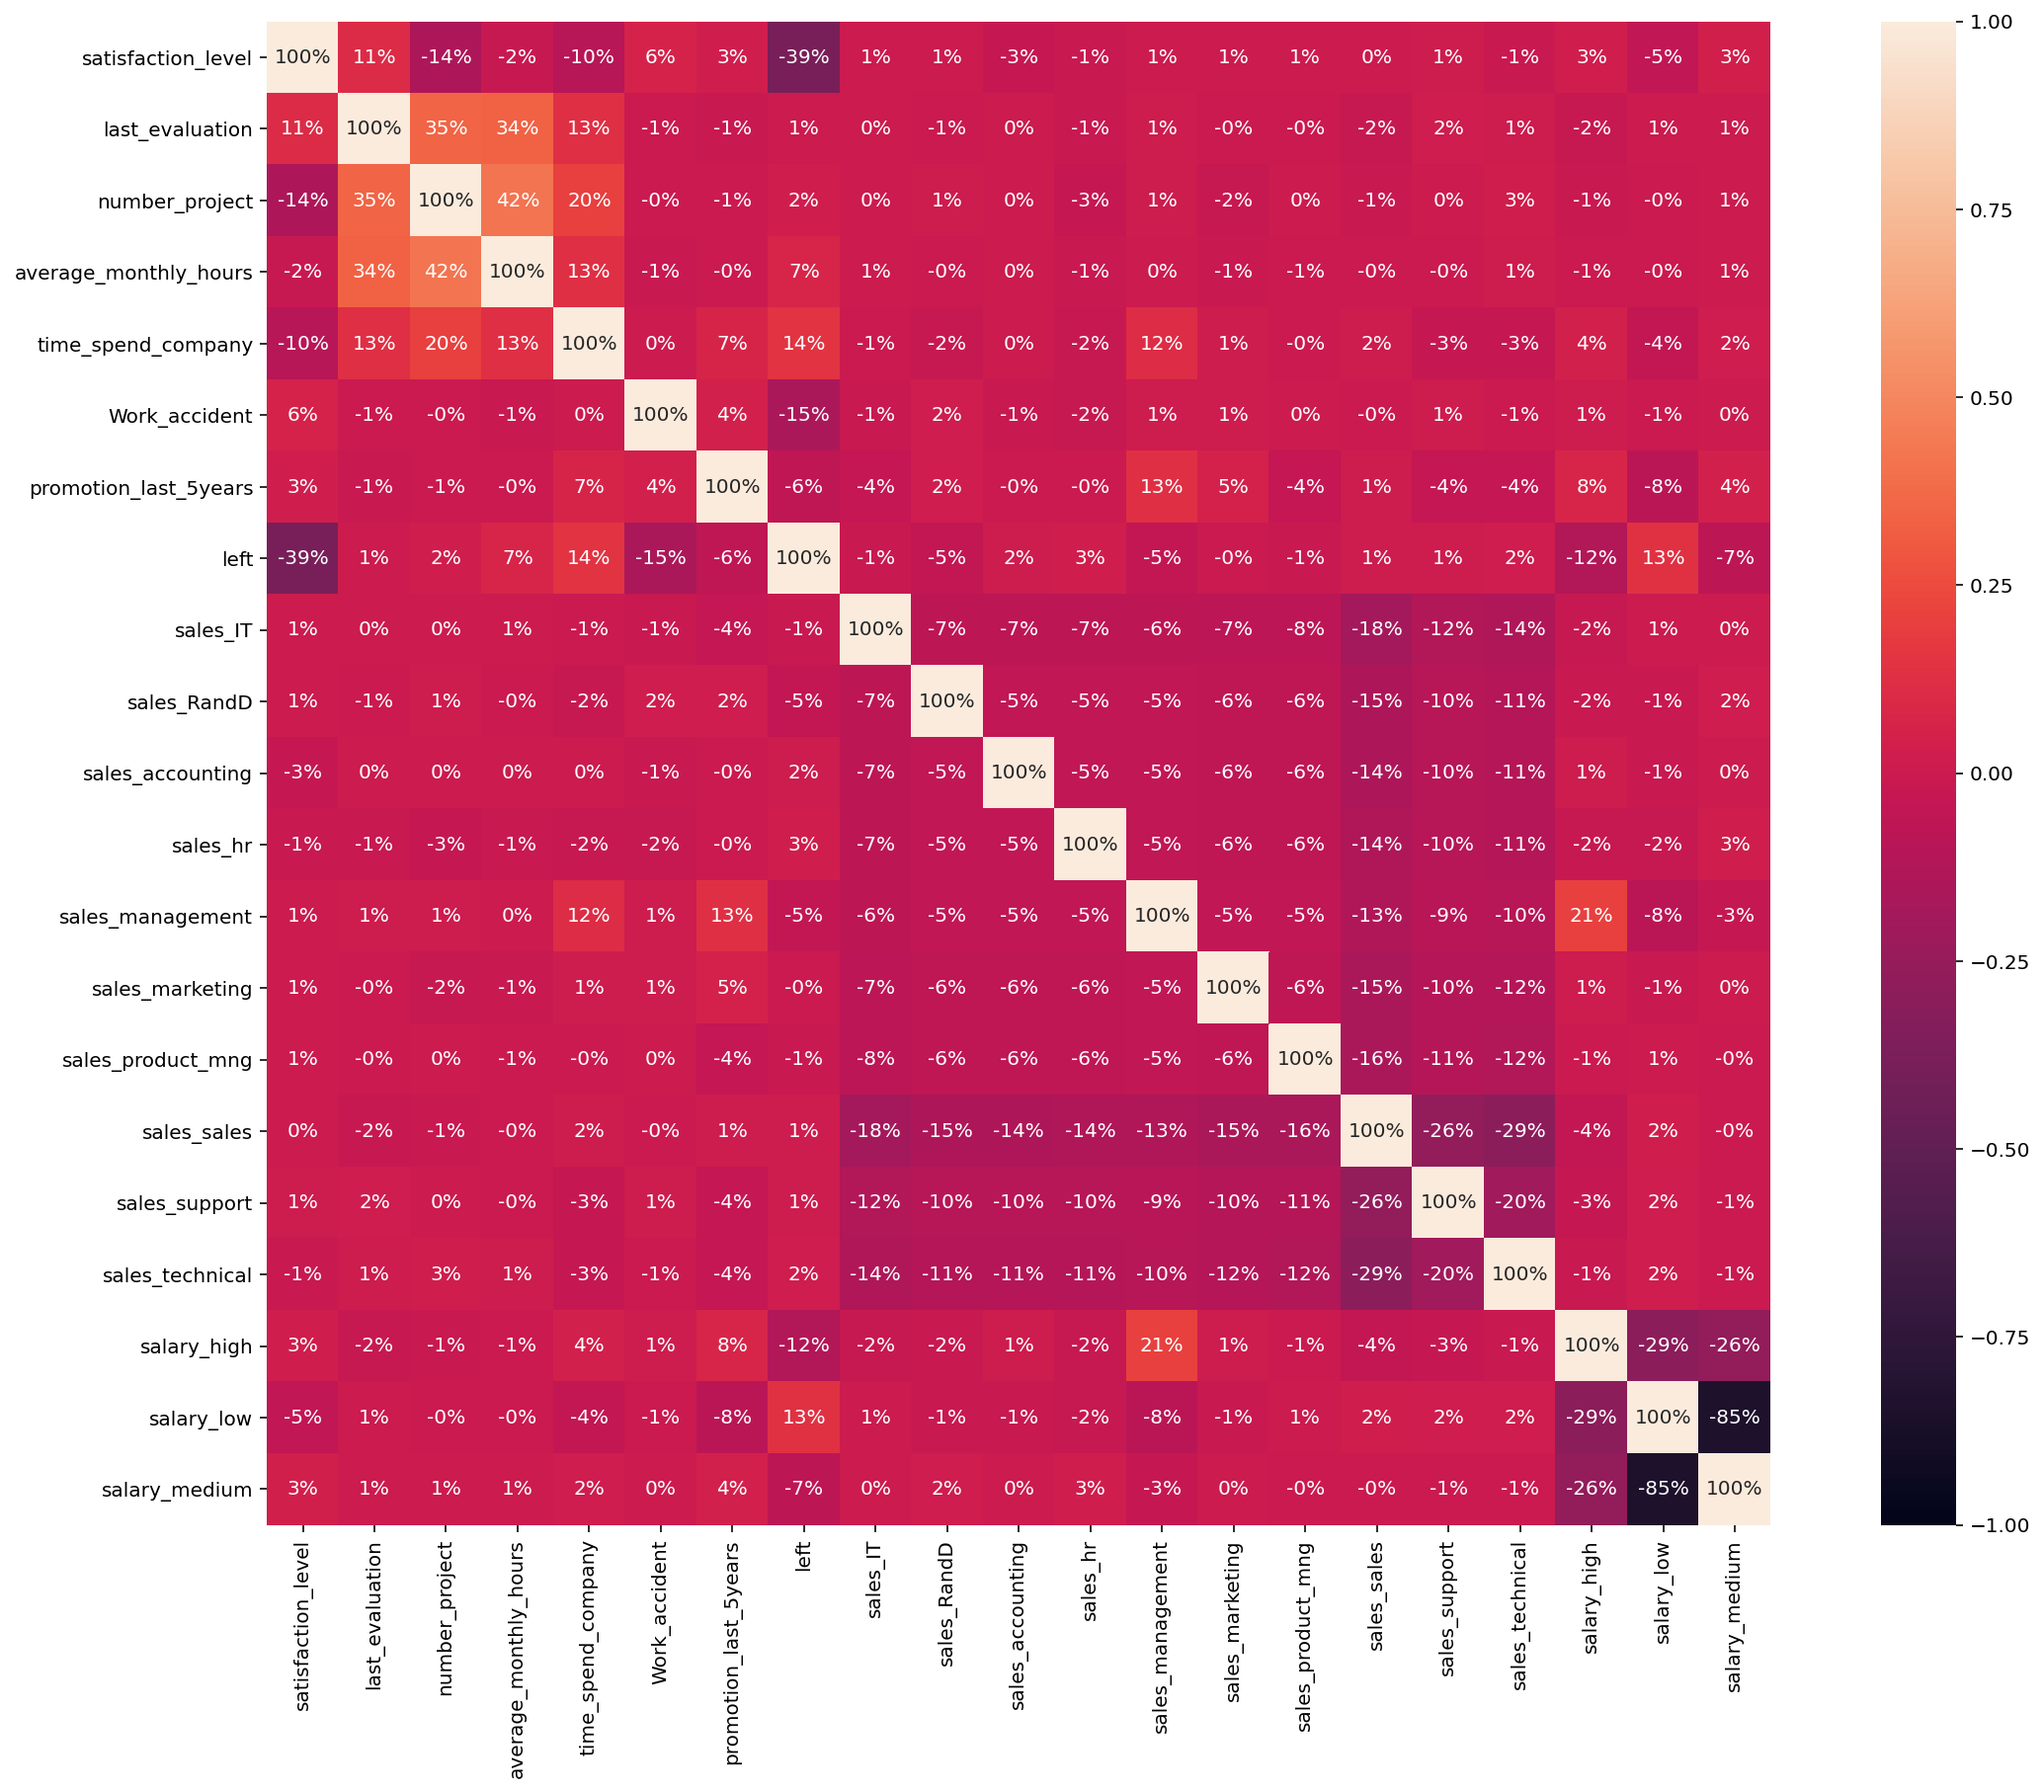

In [75]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True, square=True, vmin=-1, vmax=1, fmt=".0%")

A few observations:
- We see a consistent negative correlation between the new dummy encoded variables. E.g. `sales_hr` has a weak negative correlation with `sales_sales`. This makes sense due to how the dummy encoding works.
- Some of the observed correlations make sense. For instance `salary_high` is positively correlated with `sales_management`, which is reasonable for how most sales organizations are structured and compensated.